In [4]:
%matplotlib inline
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# For interactive plotting
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [13]:
df = pd.read_csv('input/top50.csv', encoding='latin-1')
df.head()
df = df.drop('Unnamed: 0', axis=1)
df.columns = df.columns.str.replace('.','')
print(df.columns)

Index(['TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy',
       'Danceability', 'LoudnessdB', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')


In [19]:
num_features = [feature for feature in df.columns if df[feature].dtypes == 'int64']
num_features.append('Genre')
dfi = df[num_features]
dfi.head()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre
0,117,55,76,-6,8,75,191,4,3,79,canadian pop
1,105,81,79,-4,8,61,302,8,9,92,reggaeton flow
2,190,80,40,-4,16,70,186,12,46,85,dance pop
3,93,65,64,-8,8,55,198,12,19,86,pop
4,150,65,58,-4,11,18,175,45,7,94,dfw rap


# Some cool data visualizations on numerical features

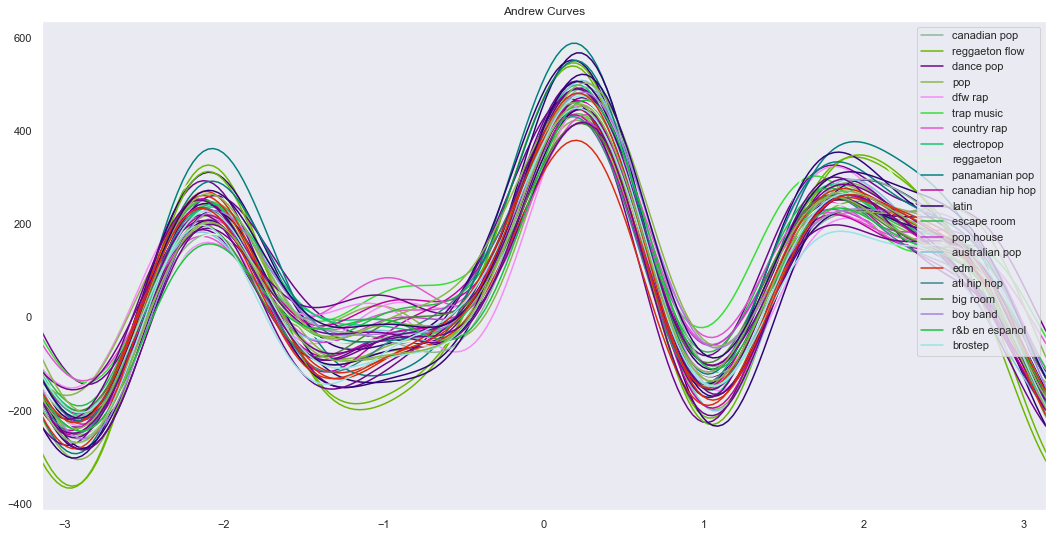

In [21]:
fig = plt.figure(figsize=(18,9))
plotting.andrews_curves(dfi, 'Genre')
plt.title('Andrew Curves')
plt.show()

Text(0, 0.5, 'Count')

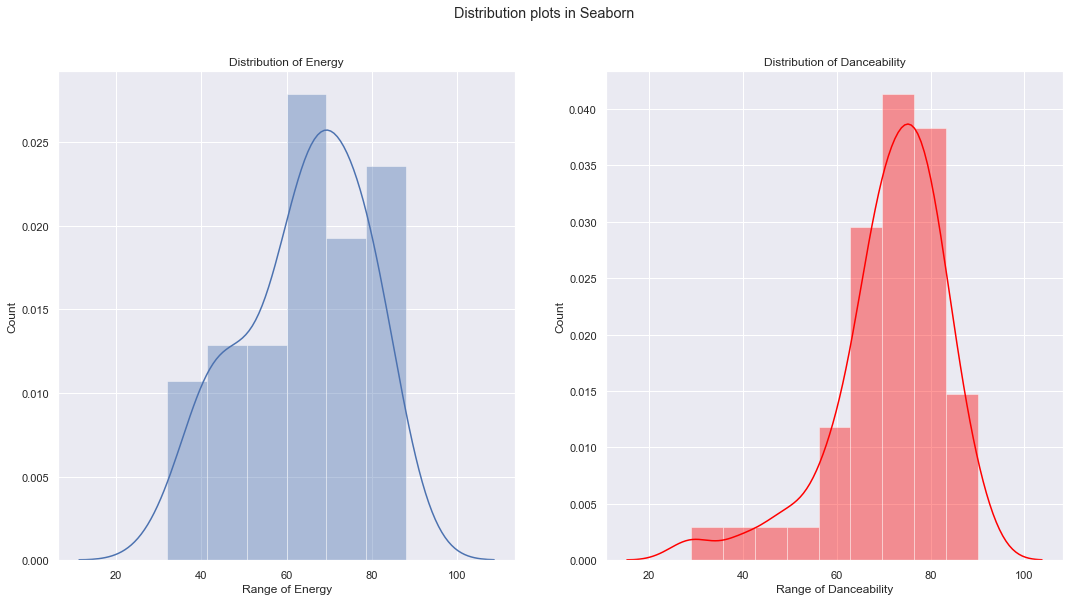

In [23]:
fig = plt.figure(figsize=(18,9))
plt.suptitle('Distribution plots in Seaborn')
plt.subplot(1,2,1)
sns.distplot(dfi['Energy'])
plt.title('Distribution of Energy')
plt.xlabel('Range of Energy')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(dfi['Danceability'], color='red')
plt.title('Distribution of Danceability')
plt.xlabel('Range of Danceability')
plt.ylabel('Count')

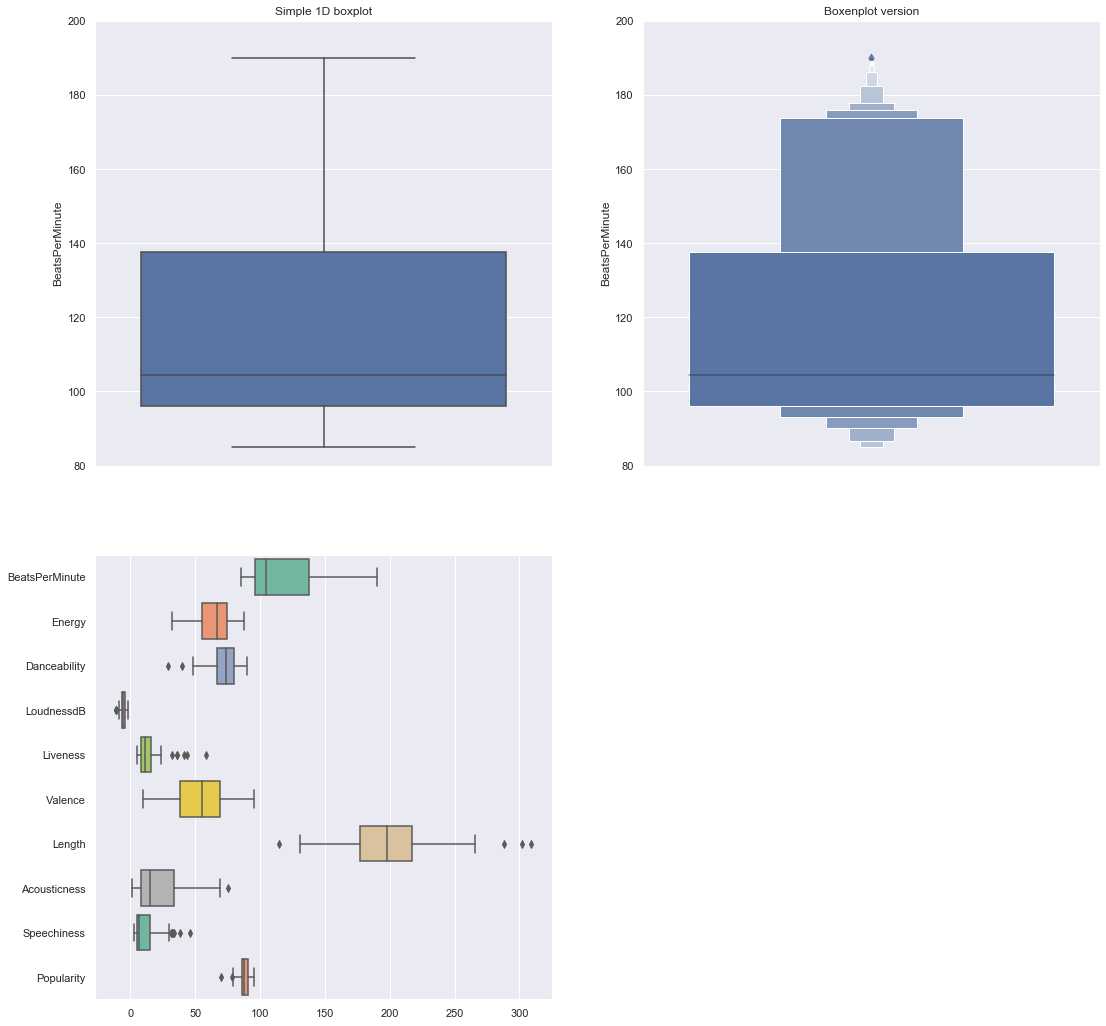

In [36]:
# Boxplots
fig = plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.title('Simple 1D boxplot')
_ = sns.boxplot(y='BeatsPerMinute', data=dfi)
plt.ylim(80, 200)

plt.subplot(2,2,2)
plt.title('Boxenplot version')
_ = sns.boxenplot(y='BeatsPerMinute', data=dfi)
plt.ylim(80, 200)

plt.subplot(2,2,3)
_ = sns.boxplot(data=dfi, orient='h', palette='Set2')

Text(0.5, 1.0, 'The ECDF shows the cumulative distribution function for a feature')

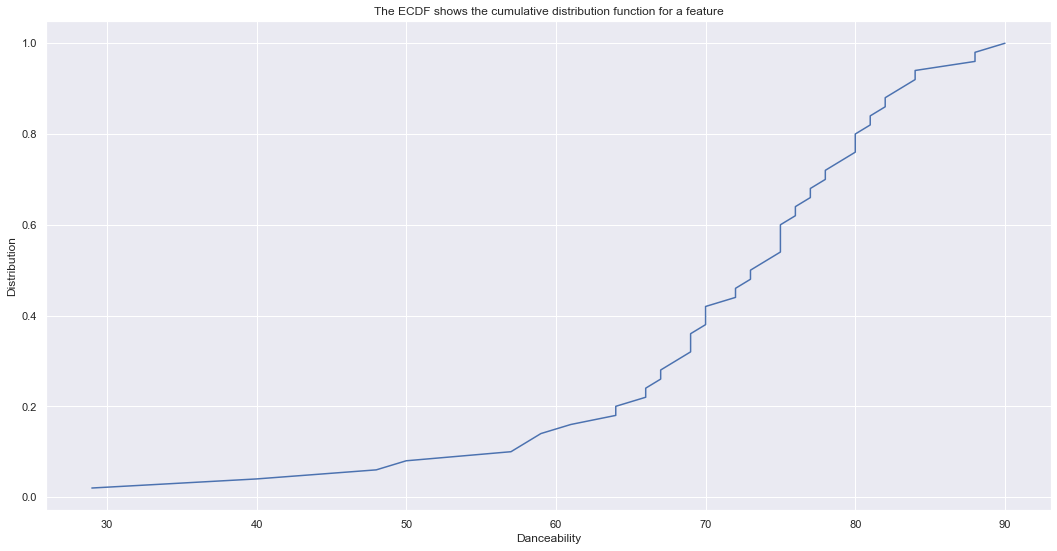

In [54]:
#Define the ecdf
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(dfi.Danceability)
fig = plt.figure(figsize=(18,9))
_ = plt.plot(x, y)
plt.ylabel('Distribution')
plt.xlabel('Danceability')
plt.title('The ECDF shows the cumulative distribution function for a feature')

Text(0.5, 1, 'Heatmap plot of the correlation matrix for the numerical features')

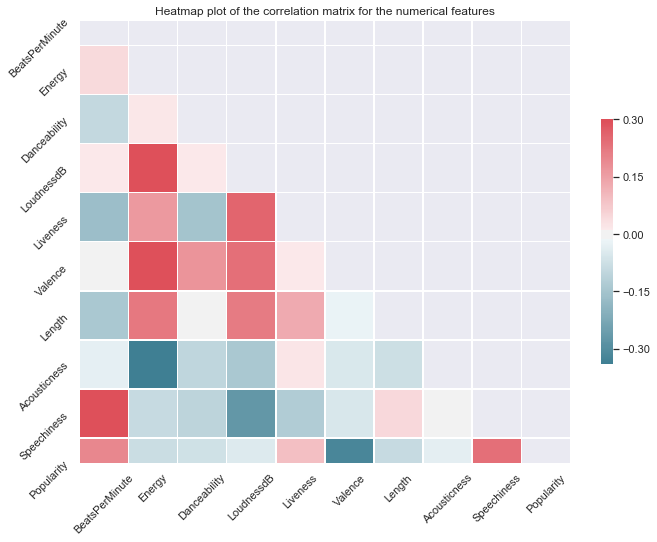

In [56]:
corr = dfi.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Heatmap plot of the correlation matrix for the numerical features')

Text(0.5, 1.0, 'Shaded lineplots for 3D overview')

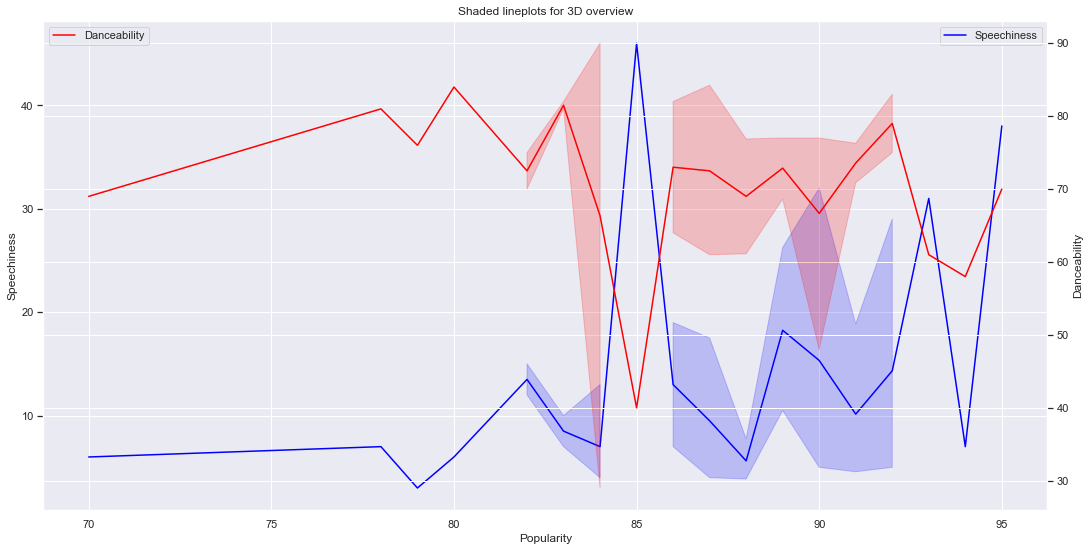

In [51]:
# Plot 3D with lineplots
z = dfi['Danceability']
y = dfi['Speechiness']
x = dfi['Popularity']

fig, ax1 = plt.subplots(figsize=(18,9))
sns.lineplot(x, y, color='blue', label='Speechiness', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x, z, color='red', label='Danceability', ax=ax2)
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.title('Shaded lineplots for 3D overview')

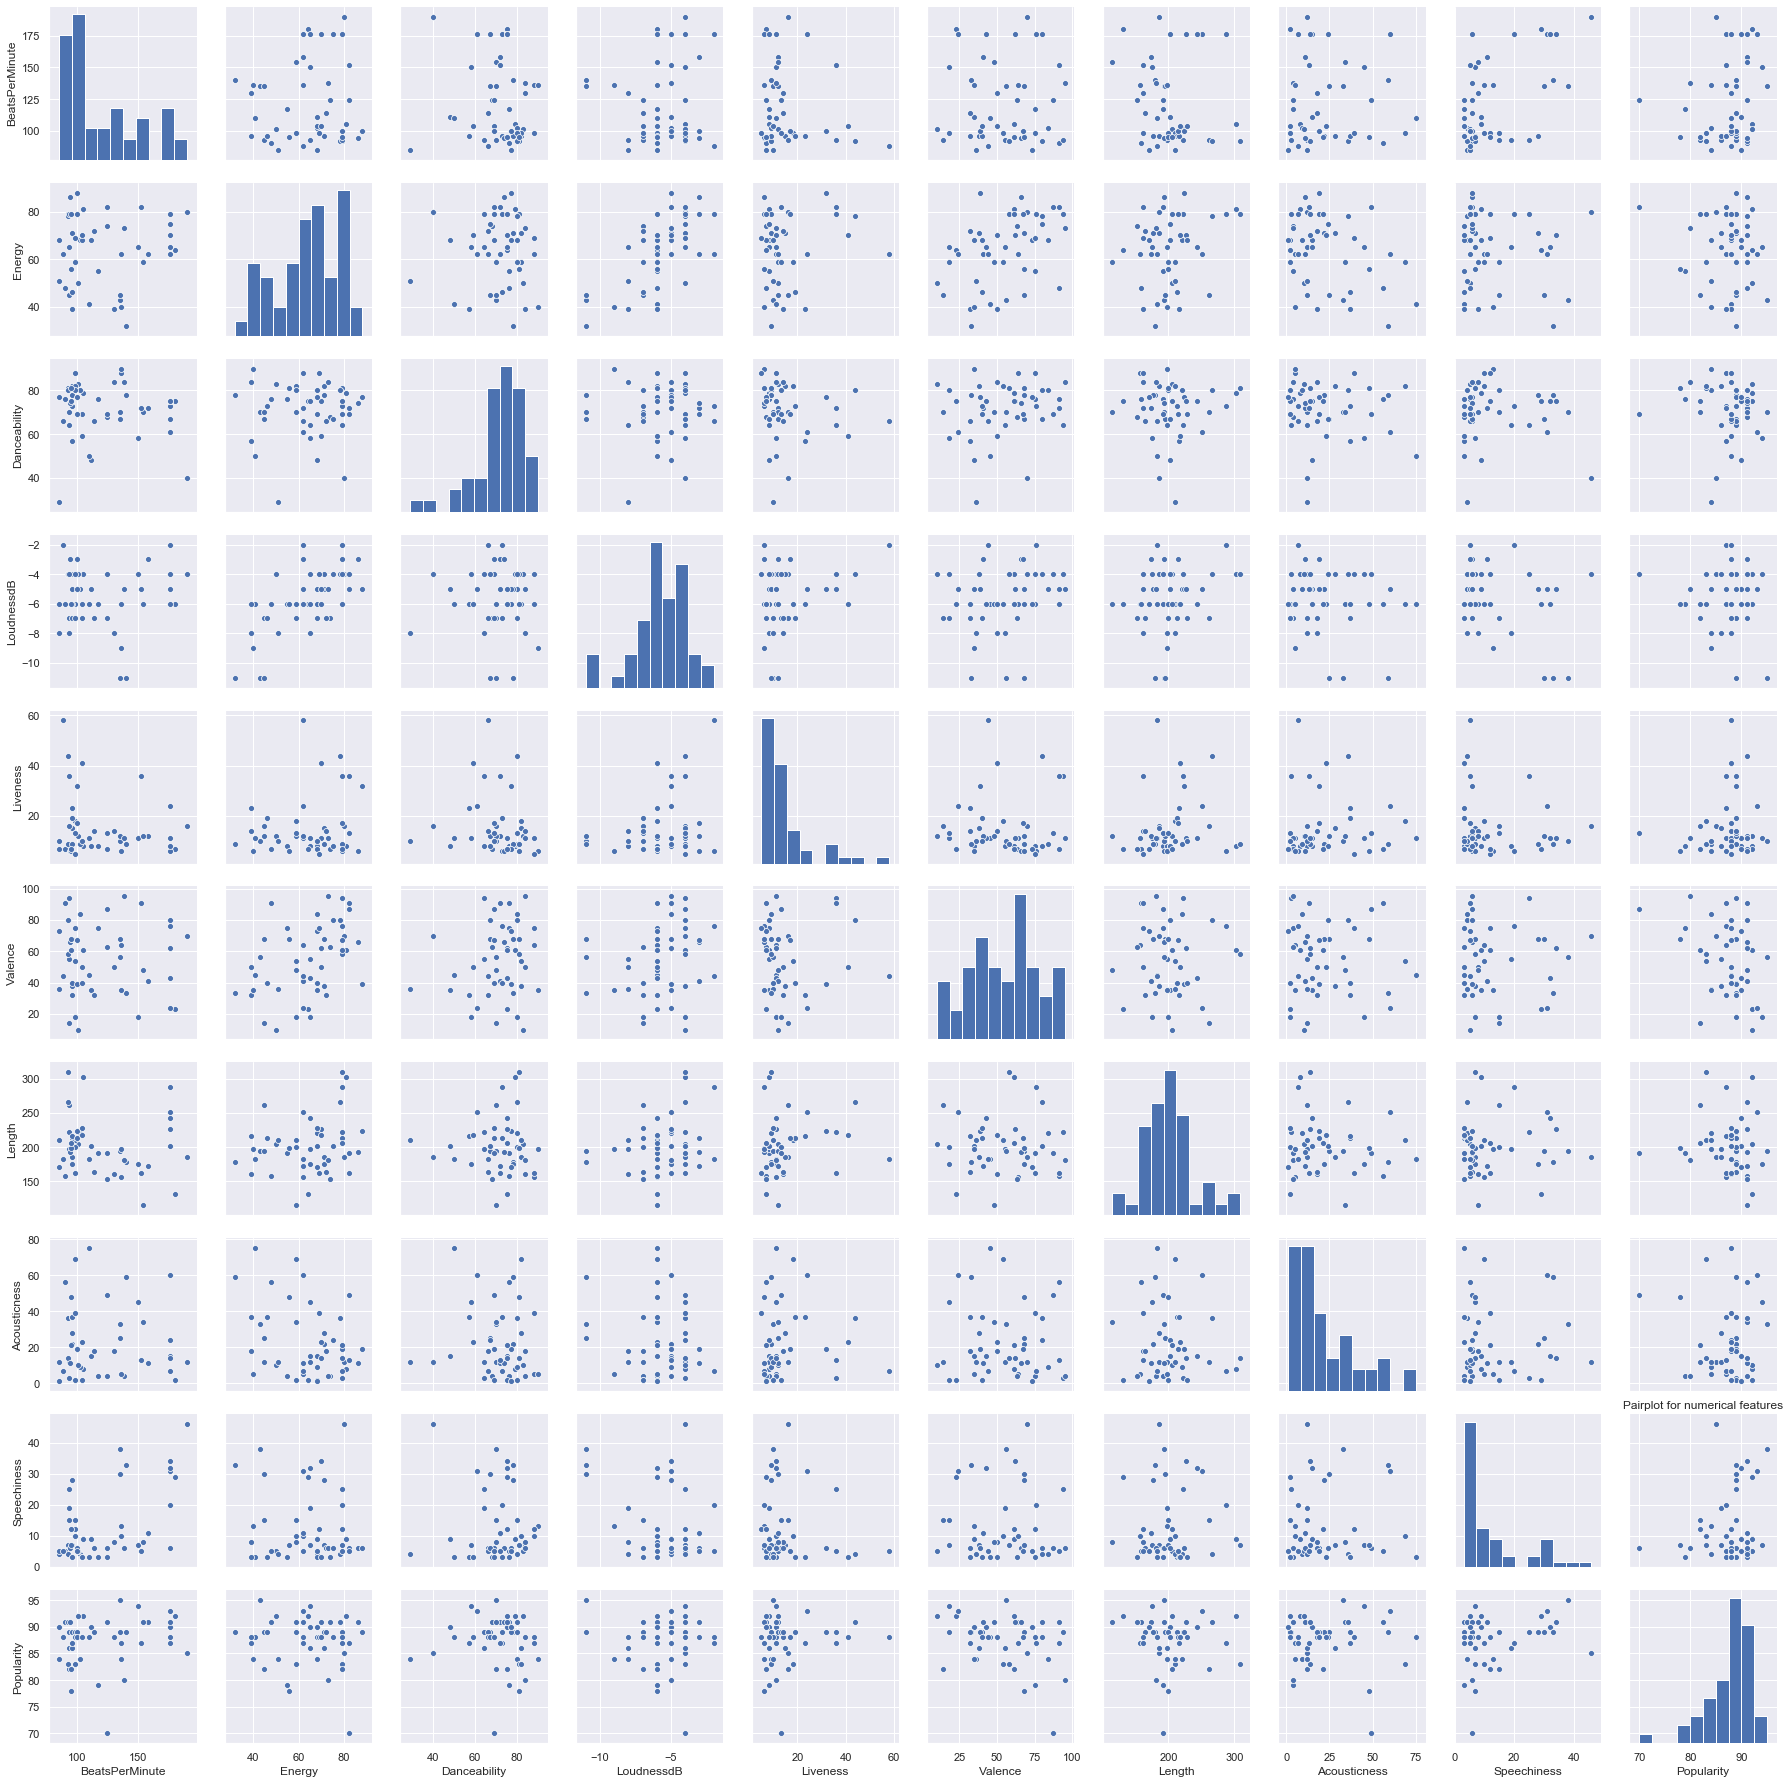

In [52]:
# Pairplot in seaborn
_ = sns.pairplot(dfi)
plt.title('Pairplot for numerical features')
plt.show()

# Plotting of categorical features

In [58]:
cat_features = [cat for cat in df.columns if df[cat].dtypes == 'object']
print(cat_features)
dfc = df[cat_features]

['TrackName', 'ArtistName', 'Genre']


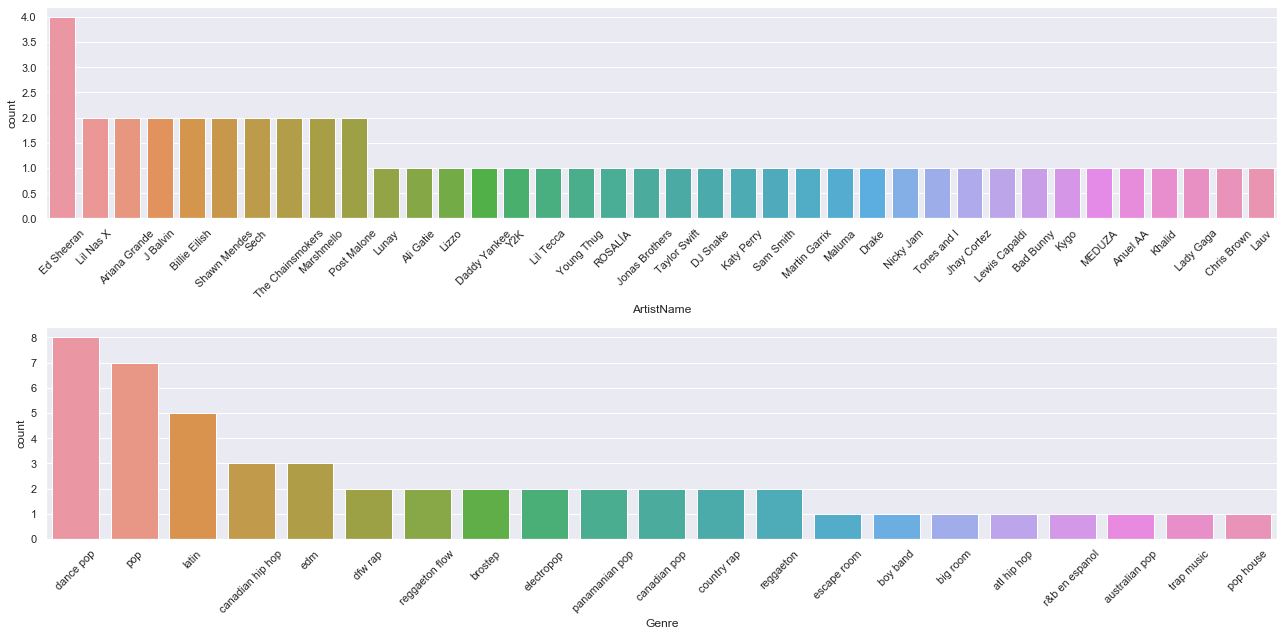

In [65]:
fig = plt.figure(figsize=(18,9))
plt.subplot(2,1,1)
_ = sns.countplot(x='ArtistName', data=dfc, order=dfc['ArtistName'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
_ = sns.countplot(x='Genre', data=dfc, order=dfc['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.tight_layout()

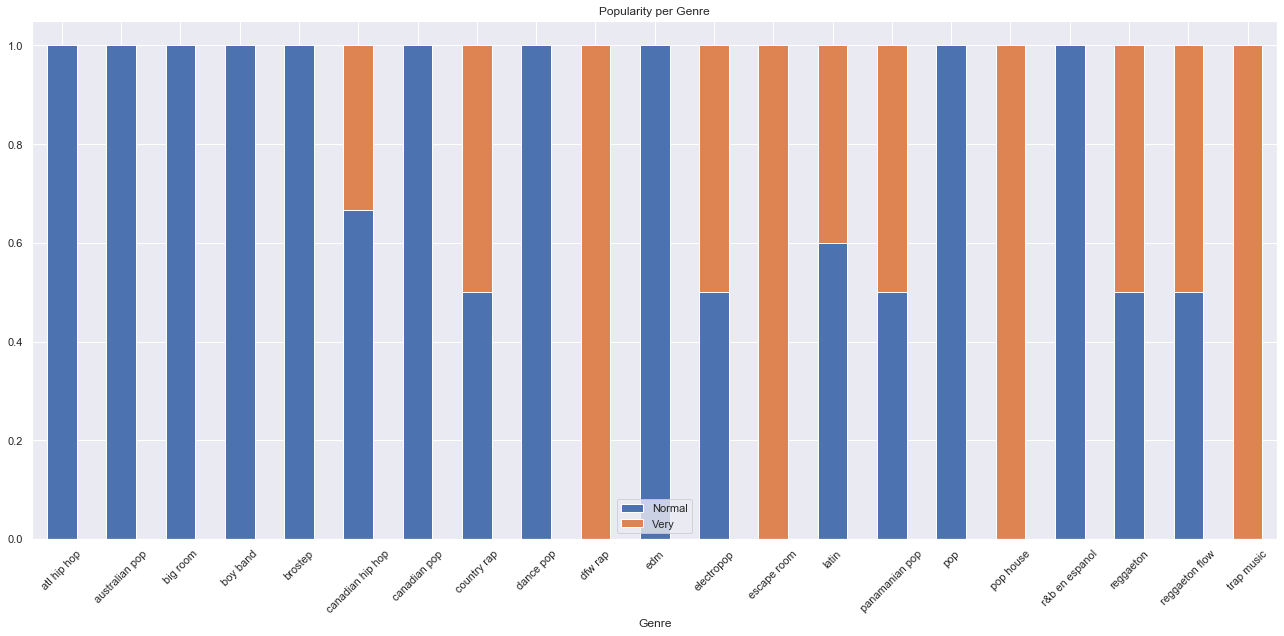

In [74]:
df['popular_group'] = df.Popularity.apply(lambda x: 'Very' if x > 90 else 'Normal')

df.groupby('Genre')['popular_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(18,9))
plt.xticks(rotation=45)
plt.title('Popularity per Genre')
plt.tight_layout()
plt.legend()